In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os

In [2]:
canada_data= pd.read_csv("canada-testing-data.csv")

In [3]:
canada_data.head(10)

,id,date,age,case_id,country,province,region,sex,travel,travelh
0,3904,2020-03-26,Not Reported,3904,Canada,Saskatchewan,Saskatoon,Not Reported,0,NaN
1,1516,2020-03-23,40-49,1516,Canada,Ontario,York,Male,1,Costa Rica
2,18454,2020-04-07,Not Reported,18451,Canada,Ontario,Toronto,Not Reported,0,NaN
3,18455,2020-04-07,Not Reported,18452,Canada,Ontario,Toronto,Not Reported,0,NaN
4,5658,2020-03-29,60-69,5657,Canada,Ontario,Algoma,Female,1,United States
5,642,2020-03-18,Not Reported,642,Canada,Nova Scotia,Not Reported,Not Reported,1,Not Reported
6,3560,2020-03-26,60-69,3560,Canada,Ontario,Simcoe Muskoka,Male,1,"India, United Arab Emirates"
7,725,2020-03-18,80-89,725,Canada,Ontario,Chatham-Kent,Female,1,United States
8,21943,2020-04-10,Not Reported,21940,Canada,Quebec,Montréal,Not Reported,0,NaN
9,18457,2020-04-07,Not Reported,18454,Canada,Ontario,Toronto,Not Reported,0,NaN


In [4]:
canada_data.shape

(50984, 10)

In [5]:
canada_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50984 entries, 0 to 50983
Data columns (total 10 columns):
id          50984 non-null int64
date        50984 non-null object
age         50984 non-null object
case_id     50984 non-null int64
country     50984 non-null object
province    50984 non-null object
region      50984 non-null object
sex         50984 non-null object
travel      50984 non-null int64
travelh     592 non-null object
dtypes: int64(3), object(7)
memory usage: 3.9+ MB


In [6]:
canada_data.describe()

,id,case_id,travel
count,50984.000000,50984.000000,50984.000000
mean,25493.418622,25491.191943,0.011611
std,14718.086883,14717.173561,0.107130
min,1.000000,1.000000,0.000000
25%,12747.750000,12746.750000,0.000000
50%,25493.500000,25490.500000,0.000000
75%,38239.250000,38236.250000,0.000000
max,50985.000000,50982.000000,1.000000


In [7]:
canada_data.describe(include=object)

,date,age,country,province,region,sex,travelh
count,50984,50984,50984,50984,50984,50984,592
unique,72,17,1,13,86,3,75
top,2020-04-22,Not Reported,Canada,Quebec,Montréal,Not Reported,Not Reported
freq,1970,49523,50984,25759,12489,49660,165


In [13]:
canada_data.describe(include="all")

,id,date,age,case_id,country,province,region,sex,travel,travelh
count,50984.000000,50984,50984,50984.000000,50984,50984,50984,50984,50984.000000,592
unique,NaN,72,17,NaN,1,13,86,3,NaN,75
top,NaN,2020-04-22,Not Reported,NaN,Canada,Quebec,Montréal,Not Reported,NaN,Not Reported
freq,NaN,1970,49523,NaN,50984,25759,12489,49660,NaN,165
mean,25493.418622,NaN,NaN,25491.191943,NaN,NaN,NaN,NaN,0.011611,NaN
std,14718.086883,NaN,NaN,14717.173561,NaN,NaN,NaN,NaN,0.107130,NaN
min,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,12747.750000,NaN,NaN,12746.750000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,25493.500000,NaN,NaN,25490.500000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,38239.250000,NaN,NaN,38236.250000,NaN,NaN,NaN,NaN,0.000000,NaN


In [14]:
canada_data.groupby("id").head()

,id,date,age,case_id,country,province,region,sex,travel,travelh
0,3904,2020-03-26,Not Reported,3904,Canada,Saskatchewan,Saskatoon,Not Reported,0,NaN
1,1516,2020-03-23,40-49,1516,Canada,Ontario,York,Male,1,Costa Rica
2,18454,2020-04-07,Not Reported,18451,Canada,Ontario,Toronto,Not Reported,0,NaN
3,18455,2020-04-07,Not Reported,18452,Canada,Ontario,Toronto,Not Reported,0,NaN
4,5658,2020-03-29,60-69,5657,Canada,Ontario,Algoma,Female,1,United States
...,...,...,...,...,...,...,...,...,...,...
50979,10865,2020-04-02,Not Reported,10864,Canada,Quebec,Montréal,Not Reported,0,NaN
50980,10867,2020-04-02,Not Reported,10866,Canada,Quebec,Montréal,Not Reported,0,NaN
50981,10869,2020-04-02,Not Reported,10868,Canada,Quebec,Montréal,Not Reported,0,NaN
50982,10873,2020-04-02,Not Reported,10872,Canada,Quebec,Montréal,Not Reported,0,NaN


In [28]:
canada_data["case_id"].value_counts()

17638    2
17639    2
2047     1
35460    1
661      1
        ..
46396    1
36155    1
34106    1
40249    1
2049     1
Name: case_id, Length: 50982, dtype: int64

In [18]:
case_ids= set(canada_data["case_id"].values)

In [82]:
canada_data.loc[canada_data["case_id"]==17639]

,id,date,age,case_id,country,province,region,sex,travel,travelh
19109,17642,2020-04-07,Not Reported,17639,Canada,Quebec,Montréal,Not Reported,0,NaN
50594,17641,2020-04-07,Not Reported,17639,Canada,Quebec,Montréal,Not Reported,0,NaN


In [53]:
canada_data['case_id']

0         3904
1         1516
2        18451
3        18452
4         5657
         ...  
50979    10864
50980    10866
50981    10868
50982    10872
50983    10878
Name: case_id, Length: 50984, dtype: int64

In [58]:
canada_data.columns

Index(['id', 'date', 'age', 'case_id', 'country', 'province', 'region', 'sex',
       'travel', 'travelh'],
      dtype='object')

In [25]:
canada_data.sort_values("case_id")

,id,date,age,case_id,country,province,region,sex,travel,travelh
10,1,2020-01-25,50-59,1,Canada,Ontario,Toronto,Male,1,China
2789,2,2020-01-27,50-59,2,Canada,Ontario,Toronto,Female,1,China
11,3,2020-01-28,40-49,3,Canada,BC,Vancouver Coastal,Male,1,China
2822,4,2020-01-31,20-29,4,Canada,Ontario,Middlesex-London,Female,1,China
16001,5,2020-02-04,50-59,5,Canada,BC,Vancouver Coastal,Female,0,NaN
...,...,...,...,...,...,...,...,...,...,...
16637,50981,2020-04-28,40-49,50978,Canada,Ontario,Thunder Bay,Male,0,NaN
16638,50982,2020-04-28,Not Reported,50979,Canada,Ontario,Peterborough,Not Reported,0,NaN
16639,50983,2020-04-28,Not Reported,50980,Canada,Ontario,Peterborough,Not Reported,0,NaN
16640,50984,2020-04-28,Not Reported,50981,Canada,Ontario,Peterborough,Not Reported,0,NaN


In [66]:
canada_data[canada_data['province']=="Ontario"].groupby("region").head()

,id,date,age,case_id,country,province,region,sex,travel,travelh
1,1516,2020-03-23,40-49,1516,Canada,Ontario,York,Male,1,Costa Rica
2,18454,2020-04-07,Not Reported,18451,Canada,Ontario,Toronto,Not Reported,0,NaN
3,18455,2020-04-07,Not Reported,18452,Canada,Ontario,Toronto,Not Reported,0,NaN
4,5658,2020-03-29,60-69,5657,Canada,Ontario,Algoma,Female,1,United States
6,3560,2020-03-26,60-69,3560,Canada,Ontario,Simcoe Muskoka,Male,1,"India, United Arab Emirates"
...,...,...,...,...,...,...,...,...,...,...
8715,26358,2020-04-13,50-59,26355,Canada,Ontario,North Bay Parry Sound,Female,1,Canada
10968,17168,2020-04-06,40-49,17167,Canada,Ontario,Algoma,Female,1,United Kingdom
15019,24856,2020-04-12,70-79,24853,Canada,Ontario,Timiskaming,Female,0,NaN
15020,24857,2020-04-12,20-29,24854,Canada,Ontario,Timiskaming,Male,0,NaN


In [73]:
canada_data[canada_data["travel"]!=0].sample(20)

,id,date,age,case_id,country,province,region,sex,travel,travelh
8994,9743,2020-04-01,60-69,9742,Canada,Ontario,Sudbury,Female,1,Canada
1470,654,2020-03-18,Not Reported,654,Canada,Saskatchewan,Regina,Not Reported,1,Mexico
6150,11374,2020-04-02,50-59,11373,Canada,Ontario,Sudbury,Male,1,Not Reported
7033,2872,2020-03-25,50-59,2872,Canada,Ontario,Simcoe Muskoka,Female,1,Austria
133,608,2020-03-18,40-49,608,Canada,Ontario,Waterloo,Female,1,"Pakistan, Turkey"
400,4046,2020-03-27,60-69,4046,Canada,Ontario,Grey Bruce,Female,1,Not Reported
3440,956,2020-03-20,60-69,956,Canada,Ontario,Middlesex-London,Female,1,Not Reported
3316,478,2020-03-17,50-59,478,Canada,Saskatchewan,Regina,Not Reported,1,Canada
1650,107,2020-03-11,30-39,107,Canada,Alberta,Calgary,Female,1,Not Reported
14632,4592,2020-03-27,Not Reported,4591,Canada,NL,Labrador-Grenfell,Not Reported,1,Not Reported


In [9]:
canada_data.sample(10)

,id,date,age,case_id,country,province,region,sex,travel,travelh
27476,23483,2020-04-11,Not Reported,23480,Canada,Ontario,Waterloo,Not Reported,0,NaN
29809,30886,2020-04-16,Not Reported,30883,Canada,Ontario,Toronto,Not Reported,0,NaN
302,25505,2020-04-13,Not Reported,25502,Canada,Quebec,Montréal,Not Reported,0,NaN
36008,48393,2020-04-27,Not Reported,48390,Canada,Quebec,Laval,Not Reported,0,NaN
30575,31117,2020-04-17,Not Reported,31114,Canada,Quebec,Laurentides,Not Reported,0,NaN
29434,13380,2020-04-04,Not Reported,13379,Canada,Quebec,Montérégie,Not Reported,0,NaN
45423,35399,2020-04-19,Not Reported,35396,Canada,Alberta,Calgary,Not Reported,0,NaN
1251,33695,2020-04-18,Not Reported,33692,Canada,Alberta,Calgary,Not Reported,0,NaN
30063,13991,2020-04-04,Not Reported,13990,Canada,Alberta,Calgary,Not Reported,0,NaN
49725,7851,2020-03-31,Not Reported,7850,Canada,Quebec,Gaspésie-Îles-de-la-Madeleine,Not Reported,0,NaN


In [10]:
canada_data.drop(["id","case_id","country"], axis=1, inplace=True)

In [11]:
canada_data.sample(10)

,date,age,province,region,sex,travel,travelh
12267,2020-04-21,Not Reported,Alberta,South,Not Reported,0,NaN
17134,2020-04-20,Not Reported,Alberta,Central,Not Reported,0,NaN
5876,2020-03-31,Not Reported,Quebec,Montréal,Not Reported,0,NaN
21351,2020-03-18,Not Reported,BC,Fraser,Not Reported,0,NaN
50942,2020-04-02,Not Reported,Quebec,Montréal,Not Reported,0,NaN
8808,2020-04-28,Not Reported,Quebec,Lanaudière,Not Reported,0,NaN
26462,2020-04-16,Not Reported,Quebec,Montréal,Not Reported,0,NaN
24401,2020-04-26,Not Reported,Quebec,Montréal,Not Reported,0,NaN
15003,2020-04-12,Not Reported,Ontario,Peel,Not Reported,0,NaN
23481,2020-04-26,Not Reported,Quebec,Montréal,Not Reported,0,NaN


In [21]:
canada_data.mean()

id         25493.418622
case_id    25491.191943
travel         0.011611
dtype: float64

In [32]:
canada_data[canada_data["date"].apply(lambda date: date=="2020-04-26")].sample(10)

,id,date,age,case_id,country,province,region,sex,travel,travelh
34996,46989,2020-04-26,Not Reported,46986,Canada,Quebec,Montréal,Not Reported,False,NaN
25482,47561,2020-04-26,Not Reported,47558,Canada,Ontario,Peel,Not Reported,False,NaN
20490,46347,2020-04-26,Not Reported,46344,Canada,Alberta,South,Not Reported,False,NaN
21070,46812,2020-04-26,Not Reported,46809,Canada,Quebec,Laval,Not Reported,False,NaN
24861,47478,2020-04-26,Not Reported,47475,Canada,Ontario,Peel,Not Reported,False,NaN
20819,46608,2020-04-26,Not Reported,46605,Canada,Quebec,Laurentides,Not Reported,False,NaN
24769,47447,2020-04-26,Not Reported,47444,Canada,Ontario,Hamilton,Not Reported,False,NaN
24593,47413,2020-04-26,Not Reported,47410,Canada,Ontario,Durham,Not Reported,False,NaN
25258,47541,2020-04-26,Not Reported,47538,Canada,Ontario,Peel,Not Reported,False,NaN
34993,46971,2020-04-26,Not Reported,46968,Canada,Quebec,Montréal,Not Reported,False,NaN


In [12]:
canada_data["travel"].value_counts()

0    50392
1      592
Name: travel, dtype: int64

In [31]:
canada_data["travel"]=canada_data["travel"].map(bool)

In [34]:
canada_data["case_id"].agg([np.mean, np.sum, np.max, np.min])

mean    2.549119e+04
sum     1.299643e+09
amax    5.098200e+04
amin    1.000000e+00
Name: case_id, dtype: float64

In [36]:
pd.crosstab(canada_data["province"], canada_data["travel"])

travel,False,True
province,,
Alberta,4826,24
BC,2019,34
Manitoba,258,14
NL,249,9
NWT,2,3
New Brunswick,95,23
Nova Scotia,897,18
Ontario,15952,385
PEI,1,26


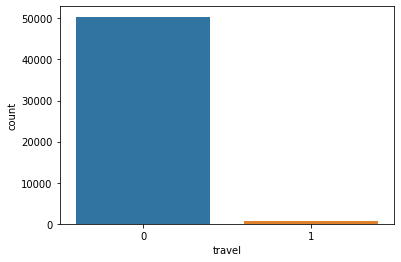

In [75]:
sns.countplot(x= "travel", data= canada_data)

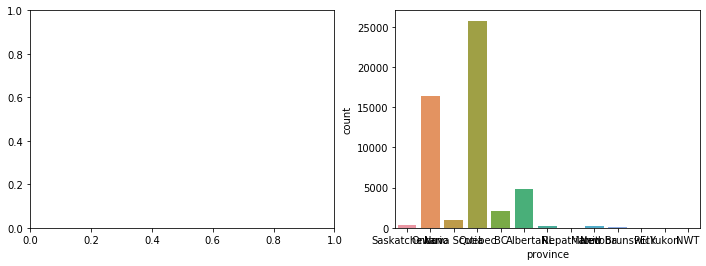

In [86]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x="province", data= canada_data, ax= axes[1])

In [14]:
canada_data.groupby("region").head()

,date,age,province,region,sex,travel,travelh
0,2020-03-26,Not Reported,Saskatchewan,Saskatoon,Not Reported,0,NaN
1,2020-03-23,40-49,Ontario,York,Male,1,Costa Rica
2,2020-04-07,Not Reported,Ontario,Toronto,Not Reported,0,NaN
3,2020-04-07,Not Reported,Ontario,Toronto,Not Reported,0,NaN
4,2020-03-29,60-69,Ontario,Algoma,Female,1,United States
...,...,...,...,...,...,...,...
40255,2020-04-13,Not Reported,NL,Western,Not Reported,0,NaN
40265,2020-04-13,50-59,New Brunswick,Zone 5 (Campbellton area),Not Reported,0,NaN
47949,2020-03-27,20-29,New Brunswick,Zone 4 (Edmundston area),Not Reported,0,NaN
47950,2020-03-27,30-39,New Brunswick,Zone 4 (Edmundston area),Not Reported,0,NaN


In [13]:
canada_data[["age","province","region"]].sort_values(by="province", ascending=True)

,age,province,region
48606,Not Reported,Alberta,Calgary
18266,Not Reported,Alberta,Calgary
22844,Not Reported,Alberta,Calgary
18265,Not Reported,Alberta,Calgary
6237,Not Reported,Alberta,Calgary
...,...,...,...
3012,Not Reported,Yukon,Yukon
17186,Not Reported,Yukon,Yukon
1845,Not Reported,Yukon,Yukon
16824,Not Reported,Yukon,Yukon


In [112]:
canada_data['province'].value_counts()

Quebec           25759
Ontario          16337
Alberta           4850
BC                2053
Nova Scotia        915
Saskatchewan       366
Manitoba           272
NL                 258
New Brunswick      118
PEI                 27
Repatriated         13
Yukon               11
NWT                  5
Name: province, dtype: int64

In [6]:
canada_case_count= pd.read_csv('Documents/programming/data/covid19-analysis/canada-cumulative-case-count-by-new-hybrid-regional-health-boundaries.csv')

In [16]:
canada_case_count.shape

(6624, 36)

In [17]:
canada_case_count.columns

Index(['objectid', 'hr_uid', 'province', 'engname', 'frename', 'casecount',
       'deaths', 'recovered', 'tests', 'totalpop2019', 'pop0to4_2019',
       'pop5to9_2019', 'pop10to14_2019', 'pop15to19_2019', 'pop20to24_2019',
       'pop25to29_2019', 'pop30to34_2019', 'pop35to39_2019', 'pop40to44_2019',
       'pop45to49_2019', 'pop50to54_2019', 'pop55to59_2019', 'pop60to64_2019',
       'pop65to69_2019', 'pop70to74_2019', 'pop75to79_2019', 'pop80to84_2019',
       'pop85older', 'averageage_2019', 'medianage_2019', 'shape_area',
       'shape_length', 'last_updated', 'sourceurl', 'globalid',
       'retrieved_at'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CFC0E3B48>,
      dtype=object)

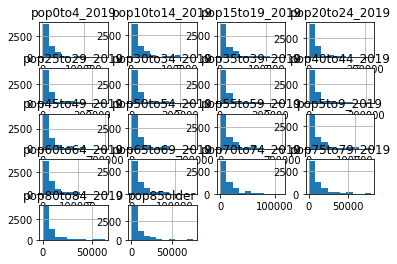

In [21]:
coll= ['pop0to4_2019',
       'pop5to9_2019', 'pop10to14_2019', 'pop15to19_2019', 'pop20to24_2019',
       'pop25to29_2019', 'pop30to34_2019', 'pop35to39_2019', 'pop40to44_2019',
       'pop45to49_2019', 'pop50to54_2019', 'pop55to59_2019', 'pop60to64_2019',
       'pop65to69_2019', 'pop70to74_2019', 'pop75to79_2019', 'pop80to84_2019',
       'pop85older']
canada_case_count[coll].hist()

In [18]:
canada_case_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6624 entries, 0 to 6623
Data columns (total 36 columns):
objectid           6624 non-null int64
hr_uid             6624 non-null int64
province           6624 non-null object
engname            6624 non-null object
frename            6624 non-null object
casecount          6624 non-null int64
deaths             4845 non-null float64
recovered          3487 non-null float64
tests              3531 non-null float64
totalpop2019       6624 non-null int64
pop0to4_2019       6624 non-null int64
pop5to9_2019       6624 non-null int64
pop10to14_2019     6624 non-null int64
pop15to19_2019     6624 non-null int64
pop20to24_2019     6624 non-null int64
pop25to29_2019     6624 non-null int64
pop30to34_2019     6624 non-null int64
pop35to39_2019     6624 non-null int64
pop40to44_2019     6624 non-null int64
pop45to49_2019     6624 non-null int64
pop50to54_2019     6624 non-null int64
pop55to59_2019     6624 non-null int64
pop60to64_2019     6624 no

In [19]:
canada_case_count.describe()

,objectid,hr_uid,casecount,deaths,recovered,tests,totalpop2019,pop0to4_2019,pop5to9_2019,pop10to14_2019,...,pop65to69_2019,pop70to74_2019,pop75to79_2019,pop80to84_2019,pop85older,averageage_2019,medianage_2019,shape_area,shape_length,last_updated
count,6624.000000,6624.000000,6624.000000,4845.000000,3487.000000,3531.000000,6.624000e+03,6624.000000,6624.000000,6624.000000,...,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6.624000e+03,6.624000e+03,6.624000e+03
mean,56.445652,2765.760870,356.983696,20.708772,93.818469,3933.708298,3.979893e+05,20992.684783,21398.760870,21356.695652,...,22512.891304,18593.956522,13194.663043,8988.826087,8967.445652,41.836413,42.539674,5.485916e+11,7.058358e+06,1.587116e+12
std,32.876869,1436.352351,998.996080,71.020167,178.322680,7345.926522,4.996018e+05,26367.640560,25833.459478,25417.825171,...,25453.931861,20955.087035,15628.343134,11151.400786,11326.500798,4.026469,5.851991,2.519062e+12,3.300618e+07,5.973174e+08
min,1.000000,471.000000,0.000000,0.000000,1.000000,178.000000,1.384900e+04,800.000000,790.000000,800.000000,...,302.000000,182.000000,85.000000,52.000000,28.000000,28.100000,25.100000,5.064297e+08,1.320794e+05,1.586030e+12
25%,29.750000,1303.750000,16.000000,0.000000,10.000000,697.000000,1.099395e+05,5745.500000,5823.000000,6013.000000,...,7789.750000,6452.500000,4559.750000,3021.250000,3171.000000,40.075000,39.275000,1.071701e+10,5.952193e+05,1.586627e+12
50%,53.500000,3526.500000,63.000000,3.000000,36.000000,1571.000000,1.909105e+05,9649.000000,9646.000000,9817.000000,...,12056.500000,10168.500000,7109.500000,4915.000000,4943.000000,42.200000,43.100000,3.422650e+10,1.392877e+06,1.587144e+12
75%,83.250000,3558.500000,270.000000,17.000000,101.000000,3475.500000,4.824042e+05,25531.500000,26679.750000,26261.000000,...,27561.250000,22861.250000,15946.750000,10626.000000,11421.000000,44.425000,46.375000,1.479078e+11,3.551779e+06,1.587602e+12
max,122.000000,6201.000000,12487.000000,1039.000000,2930.000000,59003.000000,2.987513e+06,150465.000000,134471.000000,128262.000000,...,142429.000000,113681.000000,79425.000000,63322.000000,76806.000000,49.000000,53.800000,2.272713e+13,3.117239e+08,1.588169e+12


In [20]:
canada_case_count.describe(include=object)

,province,engname,frename,sourceurl,globalid,retrieved_at
count,6624,6624,6624,6624,6624,6624
unique,13,93,93,47,92,72
top,ON,Chatham-Kent Health Unit,Zone 1 (région de Moncton),https://www.quebec.ca/en/health/health-issues/...,b8332908-ad89-44e0-bbd0-86c9e03f369d,2020-04-19 07:15:00
freq,2448,72,72,1296,72,92


In [149]:
canada_case_count.iloc[110:150, :37]

,objectid,hr_uid,province,engname,frename,casecount,deaths,recovered,tests,totalpop2019,...,pop80to84_2019,pop85older,averageage_2019,medianage_2019,shape_area,shape_length,last_updated,sourceurl,globalid,retrieved_at
110,25,2402,QC,Région du Saguenay—Lac-Saint-Jean,Région du Saguenay—Lac-Saint-Jean,273,20.0,NaN,NaN,276281,...,7706,8104,45.1,47.2,2.540617e+11,3.000150e+06,1588100400000,https://www.quebec.ca/en/health/health-issues/...,eac3fc7e-71a2-4c8b-8ef7-adaedd272237,2020-04-29 07:15:57
111,26,2403,QC,Région de la Capitale-Nationale,Région de la Capitale-Nationale,789,45.0,NaN,NaN,700684,...,17227,19379,43.3,43.1,4.239543e+10,1.345502e+06,1588100460000,https://www.quebec.ca/en/health/health-issues/...,86c78678-676c-4e27-ba98-e40183335f49,2020-04-29 07:15:57
112,27,2404,QC,Région de la Mauricie et du Centre-du-Québec,Région de la Mauricie et du Centre-du-Québec,1176,93.0,NaN,NaN,518043,...,14468,16673,45.2,47.1,1.034139e+11,2.210870e+06,1588100460000,https://www.quebec.ca/en/health/health-issues/...,e4efb474-f888-4d6e-89fa-6983b1854141,2020-04-29 07:15:57
113,28,2405,QC,Région de l'Estrie,Région de l'Estrie,826,25.0,NaN,NaN,513429,...,12873,13748,43.8,44.9,2.608167e+10,1.099065e+06,1588100520000,https://www.quebec.ca/en/health/health-issues/...,200a9a1f-cb75-41d6-ac40-2e77ebde21ea,2020-04-29 07:15:57
114,29,2406,QC,Région de Montréal,Région de Montréal,12487,1039.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,2.478708e+05,1588100520000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-29 07:15:57
115,30,2407,QC,Région de l'Outaouais,Région de l'Outaouais,270,2.0,NaN,NaN,409421,...,7501,7160,41.4,42.0,7.192139e+10,2.091063e+06,1588100580000,https://www.quebec.ca/en/health/health-issues/...,889faae9-4e01-437d-a948-5e32d396b03b,2020-04-29 07:15:57
116,31,2408,QC,Région de l'Abitibi-Témiscamingue,Région de l'Abitibi-Témiscamingue,149,3.0,NaN,NaN,148529,...,3257,3363,42.6,43.6,1.440284e+11,2.022227e+06,1588105680000,https://www.quebec.ca/en/health/health-issues/...,cef3a9ff-5524-452d-bca9-43627fdf0611,2020-04-29 07:15:57
117,32,2409,QC,Région de la Côte-Nord,Région de la Côte-Nord,114,0.0,NaN,NaN,87447,...,2162,2027,43.7,45.7,6.943192e+11,1.066786e+07,1588105680000,https://www.quebec.ca/en/health/health-issues/...,6f999911-9627-40ef-92aa-cd7fc9106c7a,2020-04-29 07:15:57
118,33,2410,QC,Région du Nord-du-Québec,Région du Nord-du-Québec,7,0.0,NaN,NaN,14642,...,273,171,41.5,42.6,9.118141e+11,7.393913e+06,1588102560000,https://www.quebec.ca/en/health/health-issues/...,17f34b76-8177-4eb1-a35b-e93ec778afc1,2020-04-29 07:15:57
119,34,3546,ON,Niagara Regional Area Health Unit,Circonscription sanitaire régionale de Niagara,472,42.0,204.0,NaN,450816,...,12668,14601,44.2,45.7,3.545058e+09,3.189421e+05,1588109280000,https://www.niagararegion.ca/health/covid-19/d...,85032ec9-5a18-4a1a-8ca6-d21acefcd298,2020-04-29 07:15:57


In [7]:
province_mean=canada_case_count.groupby('province').mean()
province_mean

,objectid,hr_uid,casecount,deaths,recovered,tests,totalpop2019,pop0to4_2019,pop5to9_2019,pop10to14_2019,...,pop65to69_2019,pop70to74_2019,pop75to79_2019,pop80to84_2019,pop85older,averageage_2019,medianage_2019,shape_area,shape_length,last_updated
province,,,,,,,,,,,,,,,,,,,,,
AB,20.000000,4833.000000,513.080556,10.255556,231.863158,19079.550877,892508.200000,56946.600000,55310.400000,53035.200000,...,40320.400000,30025.400000,19518.400000,13128.000000,13717.800000,38.320000,37.320000,4.071358e+11,3.108612e+06,1.587120e+12
BC,98.000000,593.000000,321.333333,14.433333,193.091667,13240.300000,954864.000000,45310.800000,44755.200000,47032.000000,...,64975.000000,56209.200000,46703.200000,32251.200000,23733.200000,42.620000,42.920000,5.724977e+11,8.258738e+06,1.587125e+12
MB,67.000000,4603.000000,48.677778,0.000000,NaN,NaN,277208.200000,17795.400000,17325.800000,16844.000000,...,13882.600000,11165.800000,7515.800000,5201.000000,5820.200000,37.720000,36.020000,3.746536e+11,4.038372e+06,1.587111e+12
NB,50.857143,1304.000000,16.353175,NaN,NaN,1374.428571,103917.285714,4668.857143,5138.428571,5334.571429,...,7013.285714,5946.142857,3935.571429,2546.428571,2610.142857,45.514286,48.300000,2.200759e+10,9.349297e+05,1.587112e+12
NL,75.500000,1012.500000,61.840278,0.750000,52.909091,1443.061594,126133.750000,5254.250000,5946.750000,6426.250000,...,9144.250000,7434.500000,4673.500000,2942.000000,2385.250000,44.425000,46.950000,2.766625e+11,1.073486e+07,1.587111e+12
NS,65.000000,1202.500000,150.743056,NaN,NaN,NaN,228629.250000,10219.500000,10827.000000,10973.000000,...,15021.000000,12891.500000,8534.250000,5379.250000,5335.250000,44.650000,46.975000,2.776942e+10,1.875473e+06,1.587116e+12
NT,10.000000,6101.000000,4.972222,NaN,2.916667,2124.000000,44078.000000,3013.000000,3162.000000,3289.000000,...,1579.000000,838.000000,568.000000,339.000000,259.000000,35.400000,34.600000,8.483916e+12,7.197691e+07,1.587111e+12
NU,11.000000,6201.000000,0.000000,0.000000,NaN,432.305556,37226.000000,4145.000000,3770.000000,3399.000000,...,770.000000,478.000000,234.000000,86.000000,66.000000,29.300000,27.200000,2.272713e+13,3.117239e+08,1.587117e+12
ON,45.764706,3550.058824,308.261029,19.065402,80.844729,1706.697917,419893.647059,21451.735294,21794.264706,22353.676471,...,22638.558824,18745.029412,12920.088235,9070.117647,9603.470588,42.695588,43.677941,7.180465e+10,1.214599e+06,1.587117e+12


In [10]:
province_view['median age']= province_mean['medianage_2019']

In [9]:
province_view=canada_case_count.groupby('province').sum()

In [11]:
q=["pop5to9_2019","pop10to14_2019","pop15to19_2019"]
w=["pop25to29_2019","pop30to34_2019","pop35to39_2019","pop40to44_2019","pop45to49_2019"]
e=["pop55to59_2019","pop60to64_2019","pop65to69_2019","pop70to74_2019","pop75to79_2019","pop80to84_2019","pop85older"]
for i in q:
    province_view["teens"]= np.add(province_view["pop0to4_2019"],province_view[i])
for i in w:
    province_view["young adults"]= np.add(province_view["pop20to24_2019"],province_view[i])
for i in e:
    province_view["adults"]= np.add(province_view["pop50to54_2019"],province_view[i])    
province_view

,objectid,hr_uid,casecount,deaths,recovered,tests,totalpop2019,pop0to4_2019,pop5to9_2019,pop10to14_2019,...,pop85older,averageage_2019,medianage_2019,shape_area,shape_length,last_updated,median age,teens,young adults,adults
province,,,,,,,,,,,,,,,,,,,,,
AB,7200,1739880,184709,3692.0,66081.0,5437672.0,321302952,20500776,19911744,19092672,...,4938408,13795.2,13435.2,1.465689e+14,1.119100e+09,571363375320000,37.320000,38210112,40815864,24727104
BC,35280,213480,115680,5196.0,69513.0,2780463.0,343751040,16311888,16111872,16931520,...,8543952,15343.2,15451.2,2.060992e+14,2.973146e+09,571364919180000,42.920000,34281576,45465120,25170912
MB,24120,1657080,17524,0.0,0.0,0.0,99794952,6406344,6237288,6063840,...,2095272,13579.2,12967.2,1.348753e+14,1.453814e+09,571359924540000,36.020000,12579192,13007448,8098704
NB,25632,657216,8242,0.0,0.0,692712.0,52374312,2353104,2589768,2688624,...,1315512,22939.2,24343.2,1.109182e+13,4.712046e+08,799904653080000,48.300000,5124960,6423480,5076432
NL,21744,291600,17810,66.0,4656.0,398285.0,36326520,1513224,1712664,1850760,...,686952,12794.4,13521.6,7.967880e+13,3.091640e+09,457088025060000,46.950000,3357072,4439376,3509064
NS,18720,346320,43414,0.0,0.0,0.0,65845224,2943216,3118176,3160224,...,1536552,12859.2,13528.8,7.997594e+12,5.401363e+08,457089510840000,46.975000,6314112,8277624,6078456
NT,720,439272,358,0.0,210.0,152928.0,3173616,216936,227664,236808,...,18648,2548.8,2491.2,6.108419e+14,5.182338e+09,114272000220000,34.600000,390672,419184,224280
NU,792,446472,0,0.0,0.0,31126.0,2680272,298440,271440,244728,...,4752,2109.6,1958.4,1.636354e+15,2.244412e+10,114272449080000,27.200000,508608,361008,141192
ON,112032,8690544,754623,38188.0,170259.0,2621488.0,1027899648,52513848,53352360,54721800,...,23509296,104518.8,106923.6,1.757778e+14,2.973338e+09,3885262889880000,43.677941,109143864,136315944,94066632


In [159]:
province_view[['casecount','deaths','recovered','median age','teens','young adults','adults']].sort_values('casecount', ascending=False)

,casecount,deaths,recovered,median age,teens,young adults,adults
province,,,,,,,
QC,1197552,52916.0,0.0,42.638889,57714192,69322824,53073360
ON,754623,38188.0,170259.0,43.677941,109143864,136315944,94066632
AB,184709,3692.0,66081.0,37.320000,38210112,40815864,24727104
BC,115680,5196.0,69513.0,42.920000,34281576,45465120,25170912
NS,43414,0.0,0.0,46.975000,6314112,8277624,6078456
SK,22279,276.0,14526.0,36.816667,11136672,10673352,6970752
NL,17810,66.0,4656.0,46.950000,3357072,4439376,3509064
MB,17524,0.0,0.0,36.020000,12579192,13007448,8098704
NB,8242,0.0,0.0,48.300000,5124960,6423480,5076432


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CFBFD0CC8>,
      dtype=object)

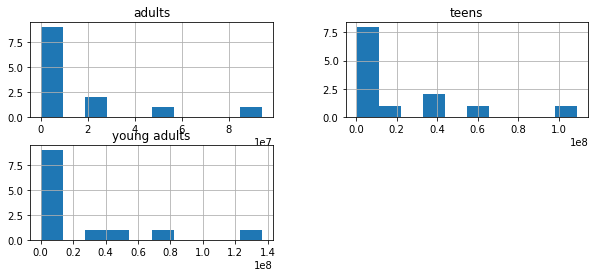

In [20]:
col = ["teens",'young adults', "adults"]
province_view[col].hist(figsize=(10,4))

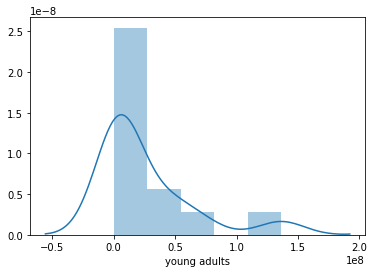

In [26]:
sns.distplot(province_view["young adults"])

In [46]:
sns.hist(province_view[col])

AttributeError: module 'seaborn' has no attribute 'hist'

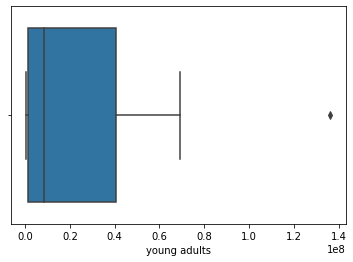

In [43]:
sns.boxplot(province_view["young adults"])

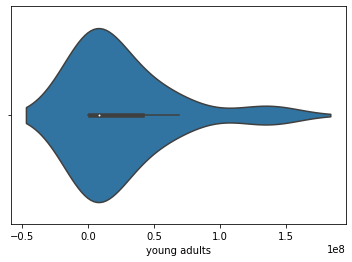

In [64]:
sns.violinplot(x="young adults", data= province_view)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CFEFE9488>],
      dtype=object)

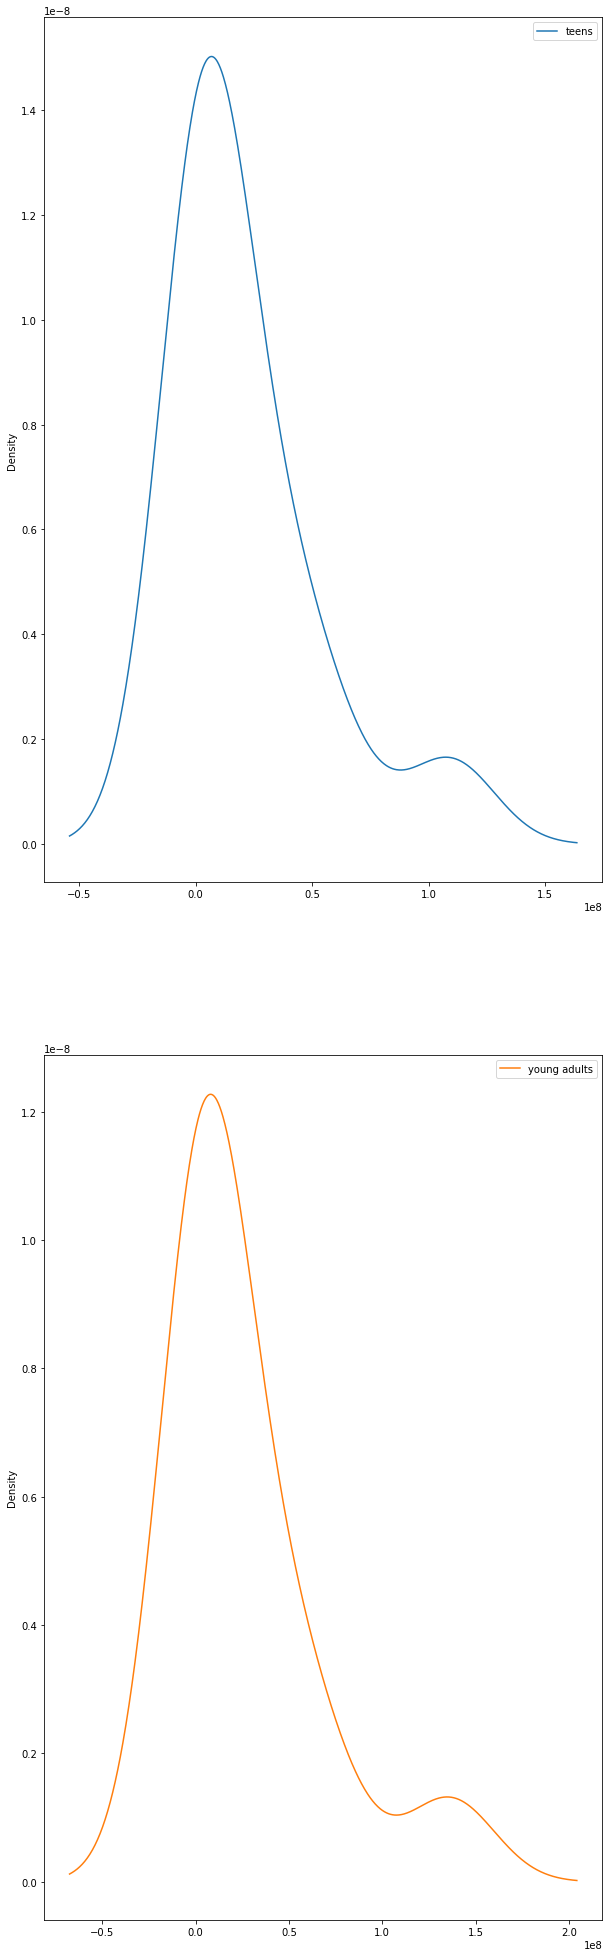

In [47]:
province_view[["teens","young adults"]].plot(kind="density", subplots=True, layout=(2,1), sharex= False, figsize=(10,35))

In [53]:
for x in province_view.iterrows():
    cols =["teens","young adults","adults"]
    totals = sum(province_view[x] for x in cols)
    print(totals)
print("this is the end")

province
AB    103753080
BC    104917608
MB     33685344
NB     16624872
NL     11305512
NS     20670192
NT      1034136
NU      1010808
ON    339526440
PE      3197664
QC    180110376
SK     28780776
YT       883656
dtype: int64
province
AB    103753080
BC    104917608
MB     33685344
NB     16624872
NL     11305512
NS     20670192
NT      1034136
NU      1010808
ON    339526440
PE      3197664
QC    180110376
SK     28780776
YT       883656
dtype: int64
province
AB    103753080
BC    104917608
MB     33685344
NB     16624872
NL     11305512
NS     20670192
NT      1034136
NU      1010808
ON    339526440
PE      3197664
QC    180110376
SK     28780776
YT       883656
dtype: int64
province
AB    103753080
BC    104917608
MB     33685344
NB     16624872
NL     11305512
NS     20670192
NT      1034136
NU      1010808
ON    339526440
PE      3197664
QC    180110376
SK     28780776
YT       883656
dtype: int64
province
AB    103753080
BC    104917608
MB     33685344
NB     16624872
NL     

In [22]:
canada_case_count.sort_values("casecount", ascending=False).head(10)

,objectid,hr_uid,province,engname,frename,casecount,deaths,recovered,tests,totalpop2019,...,pop80to84_2019,pop85older,averageage_2019,medianage_2019,shape_area,shape_length,last_updated,sourceurl,globalid,retrieved_at
22,29,2406,QC,Région de Montréal,Région de Montréal,12487,1039.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1588100520000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-29 14:16:03
114,29,2406,QC,Région de Montréal,Région de Montréal,12487,1039.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1588100520000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-29 07:15:57
206,29,2406,QC,Région de Montréal,Région de Montréal,12487,1039.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1588100520000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-28 21:15:55
390,29,2406,QC,Région de Montréal,Région de Montréal,12034,983.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1588011840000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-28 07:16:04
482,29,2406,QC,Région de Montréal,Région de Montréal,12034,983.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1588011840000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-27 21:16:06
298,29,2406,QC,Région de Montréal,Région de Montréal,12034,983.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1588011840000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-28 14:16:15
574,29,2406,QC,Région de Montréal,Région de Montréal,11621,938.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1587925560000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-27 14:15:59
758,29,2406,QC,Région de Montréal,Région de Montréal,11621,938.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1587925560000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-26 21:15:58
666,29,2406,QC,Région de Montréal,Région de Montréal,11621,938.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1587925560000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-27 07:16:00
1034,29,2406,QC,Région de Montréal,Région de Montréal,11161,895.0,NaN,NaN,1856818,...,40649,50237,40.6,39.0,9.562571e+08,247870.831035,1587839820000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-25 21:16:12


In [23]:
canada_case_count['retrieved_at'].value_counts()

2020-04-19 07:15:00    92
2020-04-11 21:15:00    92
2020-04-18 07:15:00    92
2020-04-24 21:15:58    92
2020-04-20 21:16:08    92
                       ..
2020-04-22 14:15:57    92
2020-04-06 04:15:00    92
2020-04-13 21:15:00    92
2020-04-14 14:15:00    92
2020-04-25 21:16:12    92
Name: retrieved_at, Length: 72, dtype: int64

In [1]:
canada_case_count.iloc[:3, :15]

NameError: name 'canada_case_count' is not defined

In [71]:
x= ['pop0to4_2019',
       'pop5to9_2019', 'pop10to14_2019', 'pop15to19_2019', 'pop20to24_2019',
       'pop25to29_2019', 'pop30to34_2019', 'pop35to39_2019', 'pop40to44_2019',
       'pop45to49_2019', 'pop50to54_2019', 'pop55to59_2019', 'pop60to64_2019',
       'pop65to69_2019', 'pop70to74_2019', 'pop75to79_2019', 'pop80to84_2019',
       'pop85older']
y= canada_case_count["totalpop2019"]

In [83]:
for i in x:
    canada_case_count[i] = np.divide(canada_case_count[i],y) 

In [88]:
canada_case_count.iloc[:5, 10:20]

,pop0to4_2019,pop5to9_2019,pop10to14_2019,pop15to19_2019,pop20to24_2019,pop25to29_2019,pop30to34_2019,pop35to39_2019,pop40to44_2019,pop45to49_2019
0,8.766314e-08,8.930426e-08,0.052139,0.054440,0.068289,0.077958,0.072230,0.066757,0.061344,0.061431
1,3.139646e-07,3.241741e-07,0.050201,0.051071,0.055719,0.057315,0.052107,0.051838,0.051893,0.057522
2,4.087962e-07,4.162376e-07,0.059134,0.059251,0.064300,0.062076,0.052483,0.052344,0.052593,0.055359
3,4.743558e-07,4.990656e-07,0.056589,0.058165,0.059903,0.058099,0.053560,0.053987,0.051357,0.057206
4,2.186747e-07,2.189554e-07,0.047251,0.047541,0.062403,0.079654,0.072100,0.064444,0.058786,0.058762


In [109]:
canada_case_count.sort_values(by=['casecount',"tests"], ascending=[False,False]).head(5)

,objectid,hr_uid,province,engname,frename,casecount,deaths,recovered,tests,totalpop2019,...,pop80to84_2019,pop85older,averageage_2019,medianage_2019,shape_area,shape_length,last_updated,sourceurl,globalid,retrieved_at
22,29,2406,QC,Région de Montréal,Région de Montréal,12487,1039.0,NaN,NaN,1856818,...,0.021892,0.027055,40.6,39.0,9.562571e+08,247870.831035,1588100520000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-29 14:16:03
114,29,2406,QC,Région de Montréal,Région de Montréal,12487,1039.0,NaN,NaN,1856818,...,0.021892,0.027055,40.6,39.0,9.562571e+08,247870.831035,1588100520000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-29 07:15:57
206,29,2406,QC,Région de Montréal,Région de Montréal,12487,1039.0,NaN,NaN,1856818,...,0.021892,0.027055,40.6,39.0,9.562571e+08,247870.831035,1588100520000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-28 21:15:55
298,29,2406,QC,Région de Montréal,Région de Montréal,12034,983.0,NaN,NaN,1856818,...,0.021892,0.027055,40.6,39.0,9.562571e+08,247870.831035,1588011840000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-28 14:16:15
390,29,2406,QC,Région de Montréal,Région de Montréal,12034,983.0,NaN,NaN,1856818,...,0.021892,0.027055,40.6,39.0,9.562571e+08,247870.831035,1588011840000,https://www.quebec.ca/en/health/health-issues/...,8826f734-d4c3-4ec2-ac2f-5abd6c6ab2d4,2020-04-28 07:16:04


In [56]:
canada_case_count.iloc[:3, :16]

,objectid,hr_uid,province,engname,frename,casecount,deaths,recovered,tests,totalpop2019,pop0to4_2019,pop5to9_2019,pop10to14_2019,pop15to19_2019,pop20to24_2019,pop25to29_2019
0,1,3537,ON,City of Hamilton Health Unit,Circonscription sanitaire de la cité de Hamilton,421,19.0,237.0,3758.0,576272,0.050518,0.051464,30046,31372,39353,44925
1,2,3538,ON,Hastings and Prince Edward Counties Health Unit,Circonscription sanitaire des comtés de Hastin...,39,2.0,19.0,NaN,144779,0.045455,0.046934,7268,7394,8067,8298
2,3,3539,ON,Huron Perth Public Health Unit,Circonscription sanitaire du comté de Huron Perth,44,4.0,31.0,1413.0,136672,0.055871,0.056888,8082,8098,8788,8484
